In [2]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

## Creando set de datos

## Esta red debe ser capaz de clasificar cuales son los puntos centrales y cuales no ✅

X.shape [[-0.0217928   0.18725112]
 [-0.33613238 -0.16695468]
 [ 0.4470425   0.62701339]
 [-0.3815997  -0.39605737]
 [-0.0687016  -0.23103375]]
Y.shape [0 1 1 1 0]
Y.shape [[0]
 [1]
 [1]
 [1]
 [0]]


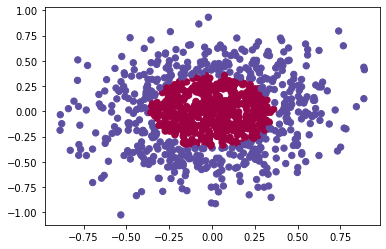

In [3]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles #x los puntos, y las clasificacion
print("X.shape", X[0:5])
print("Y.shape",Y[0:5])
Y = Y[:,np.newaxis]
print("Y.shape",Y[0:5])
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

## Función de inicialización de parámetros

In [4]:
# permite inicializar una red de neuronas con datos aleatorios
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

#ejemplo
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
print(params['W1'].shape)
print(params)
print("producto punto", np.matmul(X,params['W1']))

(2, 4)
{'W1': array([[-0.16633495,  0.67894269, -0.87891247, -0.12957356],
       [-0.28552758, -0.7982634 ,  0.17081085,  0.0468493 ]]), 'b1': array([[ 0.87447272,  0.27011531,  0.27642586, -0.22068629]]), 'W2': array([[ 0.2841677 ,  0.55468537,  0.10980033, -0.24715927, -0.45507264,
         0.26726919,  0.0833903 ,  0.97669067],
       [ 0.45494227,  0.01171544,  0.7561044 , -0.87732195, -0.95134223,
         0.07546226, -0.8900202 , -0.94441985],
       [ 0.26268987,  0.89677731,  0.59348041,  0.14936287, -0.69865698,
         0.17239539,  0.52138618,  0.1120209 ],
       [-0.16140849, -0.59483017,  0.75861238, -0.02297821,  0.26985531,
        -0.40544474, -0.27117156, -0.82679238]]), 'b2': array([[-0.68564464, -0.41701191, -0.87549785, -0.99355822, -0.86338173,
         0.47625286,  0.76472428,  0.03682262]]), 'W3': array([[-0.6547621 ],
       [-0.90594466],
       [ 0.9946188 ],
       [-0.49636101],
       [-0.01177567],
       [ 0.74828712],
       [ 0.11418981],
       [-0.7

# Función de activación

In [5]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

In [6]:
x = np.linspace(10,-10,100)

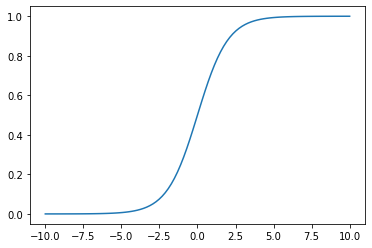

In [7]:
plt.plot(x,sigmoid(x))

## Función de pérdida

In [8]:
#permite reajuastar los pesos para que se acerque la prediccion correcta
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)
    

In [9]:
a = np.array([[2,3],
[2,3],
[2,3]])

In [10]:
a.shape

(3, 2)

In [11]:
b = np.array([[1,6,5,2],
             [1,2,7,0]])

In [12]:
b.shape

(2, 4)

In [13]:
np.matmul(a,b) # para realizar el producto punto, es lo mismoq ue hacer a@b

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

In [14]:
a@b

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

## Función de entrenamiento

In [15]:
def train(X_data,lr,params,training=True):
  ## Entrenamiento hacia adelante o Forward
  #cuando es training=False se esta ejecutando en modo prediccion para probar el modelo

  #datos de entrada
    params['A0'] = X_data
        
    # se hace la multiplicacion punto la primera capa oculta con los datos de entrada mas el baias para tener mas flexiblidad
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    # se hace la misma operacion desde la primera oculta capa a la segunda oculta usando la funcion relu
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    # se hace la misma operacion desde la segunda capa oculta a la ultima capa utilizando sigmoid
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Entrenamiento Backpropagation para corregir los pesos y mejorar la perdida
    
        #empezamos por los delta de la salida del forward con la ultima capa
        #mse (funcion de perdida)
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        #delta de dw3 (producto punto con que se obtuvo anterior con la capa anterior)
        #se usa la transpuesta para que quede (8,1000) . (1000,1)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

        #continuamos haciendo el backpropagation para llegar hasta la primera capa
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        #llegamos a la primera capa
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent: Actualizamos los pesos de la red neuronal
        ## lr: learning rate que tanto avanza los pasos para encontrar el punto mas bajo y con menos error
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

## Entrenando la red

In [16]:
#forma de la red neuronal
layer_dims =[2, 4, 8, 1]
#creamos la red neuronal con datos aleatorios
params = initialize_parameters_deep(layer_dims)
#lista para errores
errors = []

#hacemos iteraciones para el entrenamiento
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        
        errors.append(mse(Y,output))
    if _ % 10000 == 0:
        print(mse(Y,output)) #entre menor sea el numero mejor la prediccion del modelo
        

0.3398880382076269
0.007058715747447014
0.006490310193549993
0.0061420181416139245
0.005832210795541553


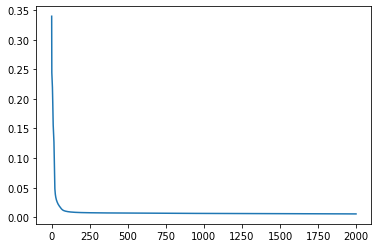

In [17]:
plt.plot(errors)

### Probando sobre datos nuevos

In [18]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

In [19]:
y = np.where(y >= 0.5, 1, 0)

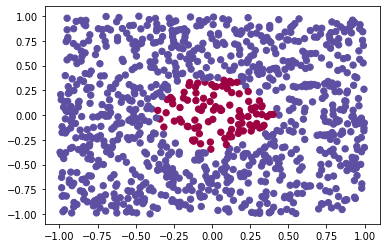

In [20]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);
#el resultado de la red es que pudo correctamente clasificar los puntos del centro con los que no estan en el centro

## Malla de visualización

In [21]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [22]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False) #training=False para que solo haga la prediccion

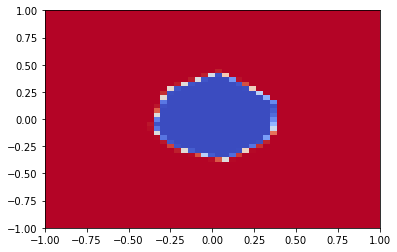

In [23]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')